# Data Cleaning

## Phase 1: Data Exploration and Assessment

### Task 1.1: Initial Data Inspection

In [1]:
!pip install kagglehub[pandas-datasets]

In [2]:
# Importing essential libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"supunjayawardana","key":"f6d20394dc81dbe1fa95e72d4cd321c1"}'}

In [4]:
import os
import shutil

# Create the .kaggle directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move the kaggle.json into the right directory
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the CSV file within the dataset
file_path = "hotel_bookings.csv"

# Load the dataset directly into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "jessemostipak/hotel-booking-demand",
    file_path
)

In [6]:
# Display the first t rows of dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Display the last 5 rows of the dataset
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# Check the number of rows and columns in the dataset (shape)
df.shape

(119390, 32)

In [9]:
# Checking the column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Checking the data types of each column
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [12]:
# Statistical summary of dataset
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Task 1.2: Missing Value Analysis


In [13]:
# Checking the total number of missing values in the dataset
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [14]:
# Identifying the columns with missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

children         4
country        488
agent        16340
company     112593
dtype: int64


In [15]:
# Calculating the percentage of missing values for each column
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({
    "Missing Values": missing,
    "Missing %": missing_percent
}).sort_values(by="Missing %", ascending=False)

print(missing_report[missing_report["Missing Values"] > 0])

          Missing Values  Missing %
company           112593  94.306893
agent              16340  13.686238
country              488   0.408744
children               4   0.003350


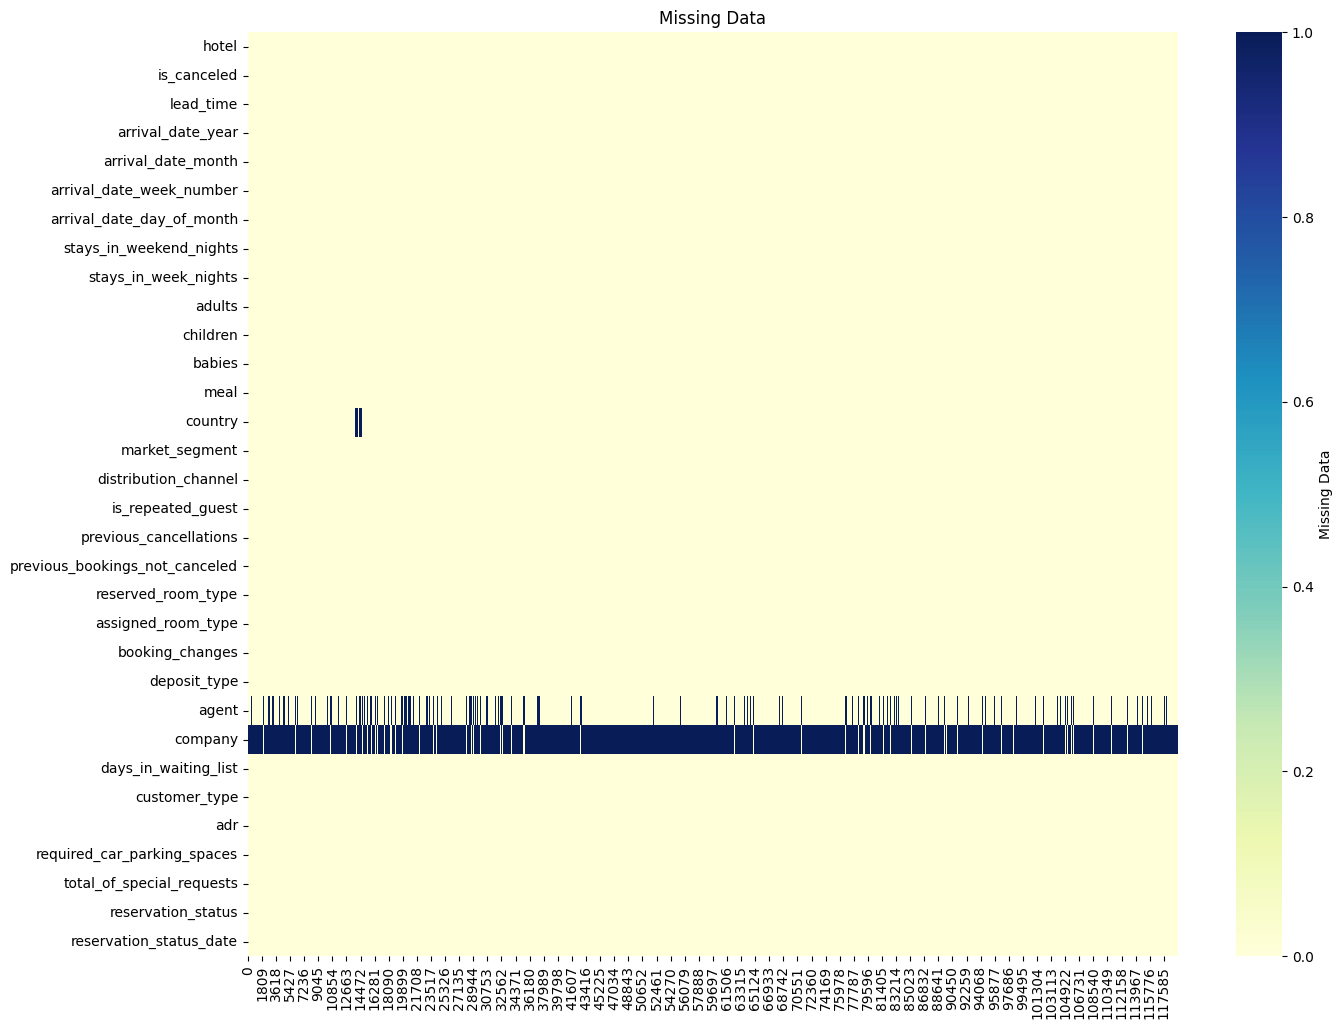

In [16]:
# Visualise missing value patterns using a heatmap
missing_data = df.isnull()
plt.figure(figsize=(15, 12))
sns.heatmap(missing_data.transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title("Missing Data")
plt.show()

### Task 1.3: Data Quality Assessment

In [ ]:
# Check for duplicate values
duplicates = df[df.duplicated()]
print("Number of duplicates :", len(duplicates))

Number of duplicates : 31994


In [ ]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
# numerical columns
numerical = df.select_dtypes(include=['int64', 'float64'])
print(numerical.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


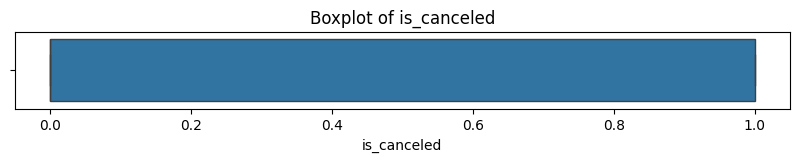

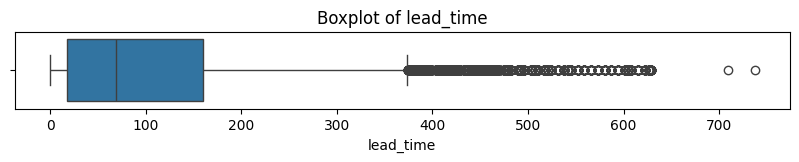

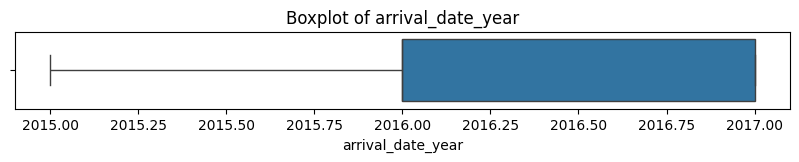

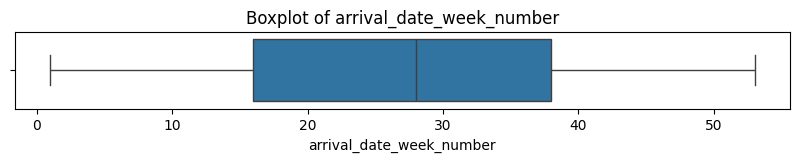

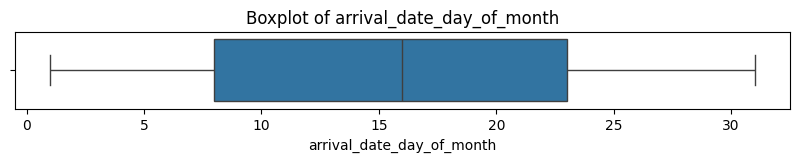

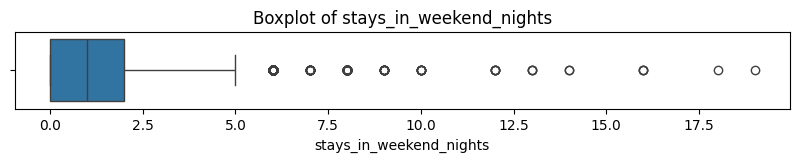

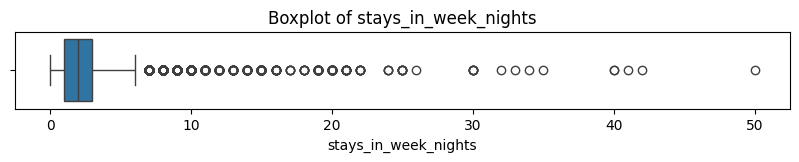

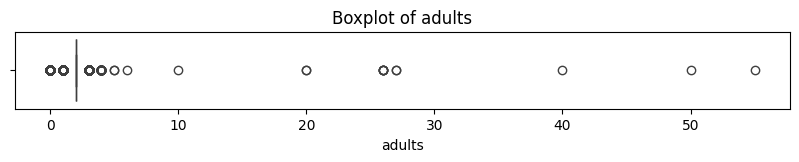

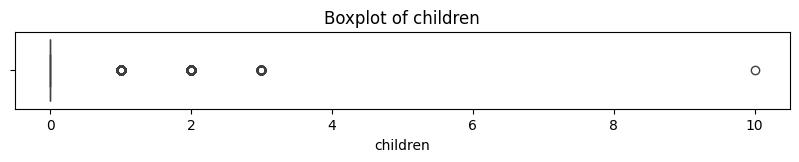

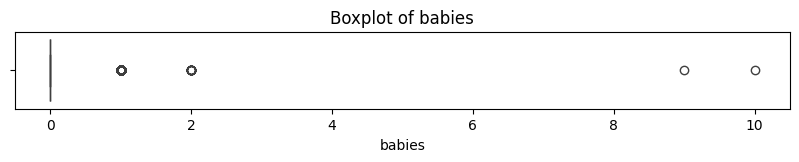

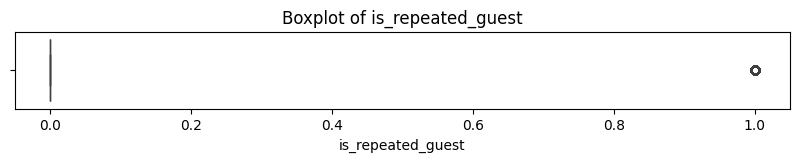

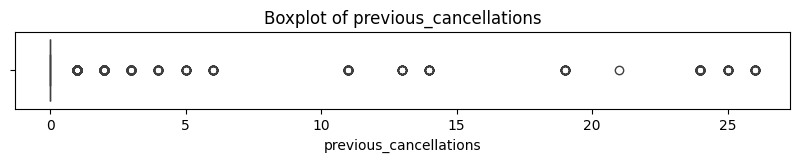

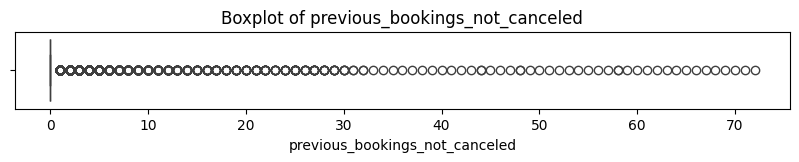

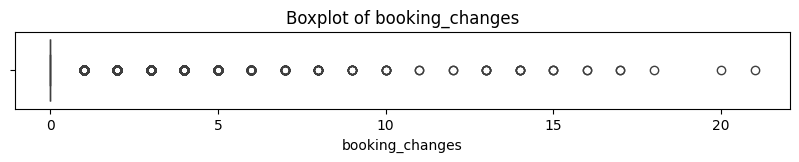

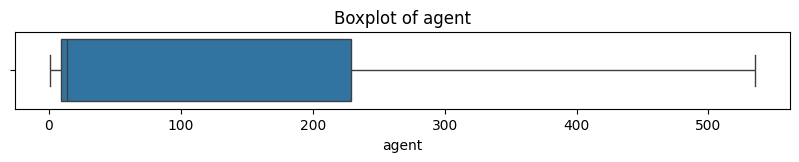

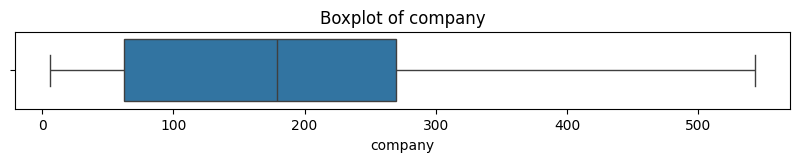

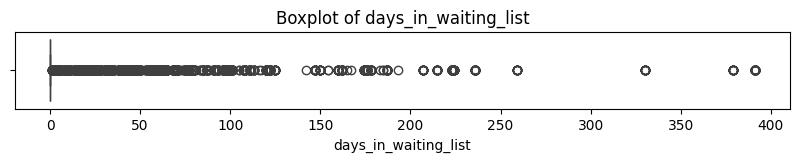

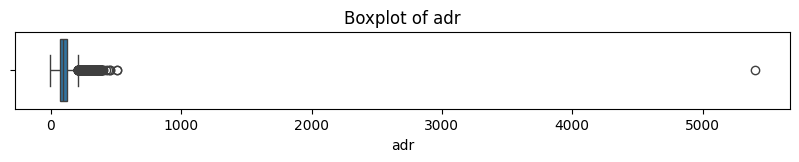

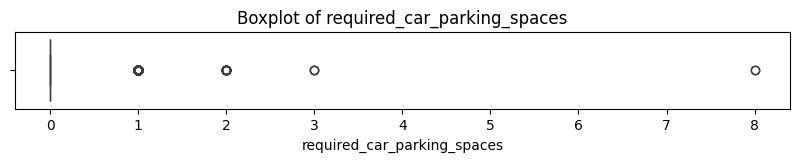

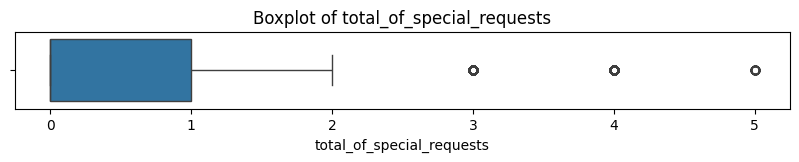

In [ ]:
for col in numerical.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Identify outliers using the Interquartile Range (IQR) method
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

for col in numerical.columns:
  outliers = iqr_outliers(df, col)
  print(f"{len(outliers)} outliers found in {col} column.")

0 outliers found in is_canceled column.
3005 outliers found in lead_time column.
0 outliers found in arrival_date_year column.
0 outliers found in arrival_date_week_number column.
0 outliers found in arrival_date_day_of_month column.
265 outliers found in stays_in_weekend_nights column.
3354 outliers found in stays_in_week_nights column.
29710 outliers found in adults column.
8590 outliers found in children column.
917 outliers found in babies column.
3810 outliers found in is_repeated_guest column.
6484 outliers found in previous_cancellations column.
3620 outliers found in previous_bookings_not_canceled column.
18076 outliers found in booking_changes column.
0 outliers found in agent column.
0 outliers found in company column.
3698 outliers found in days_in_waiting_list column.
3793 outliers found in adr column.
7416 outliers found in required_car_parking_spaces column.
2877 outliers found in total_of_special_requests column.


In [ ]:
# Identify columns with categorical values
categorical_types = df.select_dtypes(include='object')
print(categorical_types.columns)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


In [ ]:
# Check for inconsistent values in categorical columns
for col in categorical_types.columns:
  print(f"Unique Values in {col} Columns: {df[col].unique()}")

Unique Values in hotel Columns: ['Resort Hotel' 'City Hotel']
Unique Values in arrival_date_month Columns: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique Values in meal Columns: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique Values in country Columns: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'E

## Phase 2: Data Cleaning Implementation

### Task 2.1: Handling Missing Values

In [45]:
# Create a copy of the dataframe to perform cleaning operations on
df_cleaned = df.copy()

In [46]:
# Checking the total number of missing values for each column in the dataset
df_cleaned.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [47]:
# checking the total number of missing values in children column
df_cleaned['children'].isnull().sum()

np.int64(4)

In [48]:
# Replace NaN with 0 for children column (assume no children if not specified)
df_cleaned['children'].fillna(0, inplace=True)
df_cleaned['children'].isnull().sum()

np.int64(0)

In [49]:
# Imputation of missing values in Country column using mode
print(f"Missing Values in Country column before imputation : {df_cleaned['country'].isna().sum()}")
df_cleaned['country'] = df_cleaned['country'].fillna(df['country'].mode().iloc[0])
print(f"Missing Values in Country column after imputation with mode: {df_cleaned['country'].isna().sum()}")

Missing Values in Country column before imputation : 488
Missing Values in Country column after imputation with mode: 0


In [50]:
# Replace NaN values in Agent column with 0
print(f"Toal number of missing values in Country column before imputation : {df_cleaned['agent'].isna().sum()}")
df_cleaned['agent'].fillna(0, inplace=True)
print(f"Toal number of missing values in Country column after imputation : {df_cleaned['agent'].isna().sum()}")

Toal number of missing values in Country column before imputation : 16340
Toal number of missing values in Country column after imputation : 0


In [51]:
# Replace NaN values in Company column with 0
print("Total NaN values in Company column before imputation:", df_cleaned['company'].isna().sum())
df_cleaned['company'] = df_cleaned['company'].fillna(0)
print("Total NaN values in Company column after imputation:", df_cleaned['company'].isna().sum())

Total NaN values in Company column before imputation: 112593
Total NaN values in Company column after imputation: 0


### Task 2.2: Duplicate Detection and Removal

In [37]:
# total num of duplicates
initial_duplicates = df_cleaned.duplicated().sum()
print("Number of exact duplicates before removal:", initial_duplicates)

Number of exact duplicates before removal: 32013


In [38]:
# DDropping exact duplicates
df_cleaned.drop_duplicates(inplace=True)
duplicates_removed = initial_duplicates - df_cleaned.duplicated().sum()

print(f"Number of exact duplicates removed: {duplicates_removed}")
print(f"Shape of dataset after exact duplicate removal: {df_cleaned.shape}")

Number of exact duplicates removed: 32013
Shape of dataset after exact duplicate removal: (87377, 32)


In [39]:
# check for exact duplicates after dropping the duplicates to verify
df_cleaned.duplicated().sum()

np.int64(0)

###  Task 2.3: Outlier Detection and Treatment

In [40]:
df_cleaned[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
count,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000
mean,79.905856,1.005390,2.625645,1.875906,0.138663,0.010827,106.345111
std,86.055523,1.031961,2.053685,0.626483,0.455916,0.113609,55.005117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,72.000000
50%,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,98.100000
75%,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,134.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,5400.000000


In [52]:
# Using IQR for outlier detection
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']
for col in cols:
    iqr = df_cleaned[col].quantile(0.75) - df_cleaned[col].quantile(0.25)
    print(f"IQR of {col} is {iqr}")

IQR of lead_time is 142.0
IQR of stays_in_weekend_nights is 2.0
IQR of stays_in_week_nights is 2.0
IQR of adults is 0.0
IQR of children is 0.0
IQR of babies is 0.0
IQR of adr is 56.709999999999994


In [53]:
# Apply Z-Score method
from scipy.stats import zscore
for col in cols:
  z_scores = np.abs(zscore(df_cleaned[col].dropna())) # Dropna to handle NaNs if any slipped through or for other columns
  zscore_outliers = (z_scores > 3).sum() # Common threshold for z-score
  print(f"Z-score Outliers (>3 std dev) in {col}: {zscore_outliers} ({(zscore_outliers / len(df_cleaned) * 100):.2f}%)")

Z-score Outliers (>3 std dev) in lead_time: 1454 (1.22%)
Z-score Outliers (>3 std dev) in stays_in_weekend_nights: 2199 (1.84%)
Z-score Outliers (>3 std dev) in stays_in_week_nights: 1669 (1.40%)
Z-score Outliers (>3 std dev) in adults: 481 (0.40%)
Z-score Outliers (>3 std dev) in children: 3729 (3.12%)
Z-score Outliers (>3 std dev) in babies: 917 (0.77%)
Z-score Outliers (>3 std dev) in adr: 1138 (0.95%)


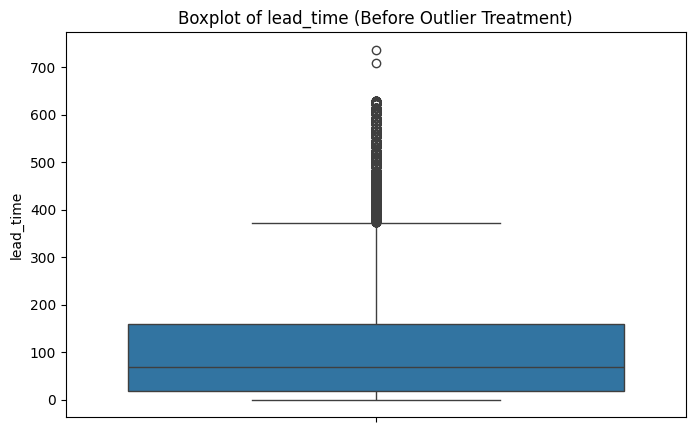

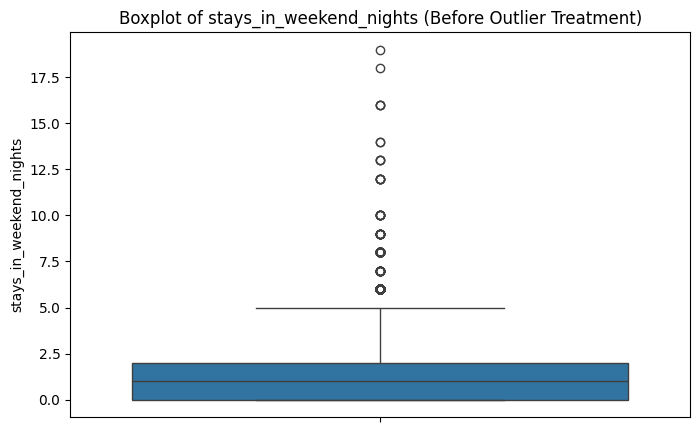

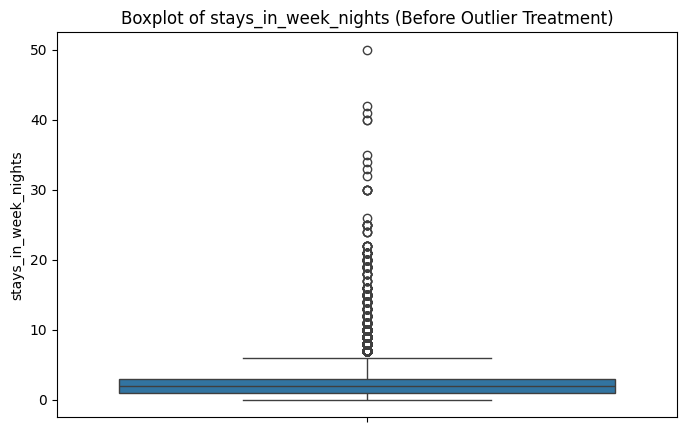

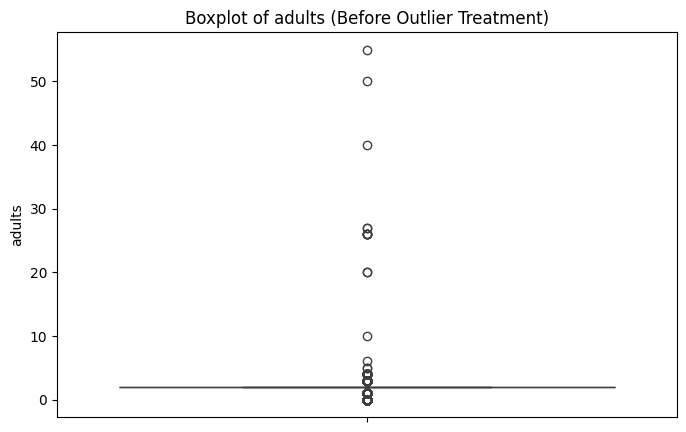

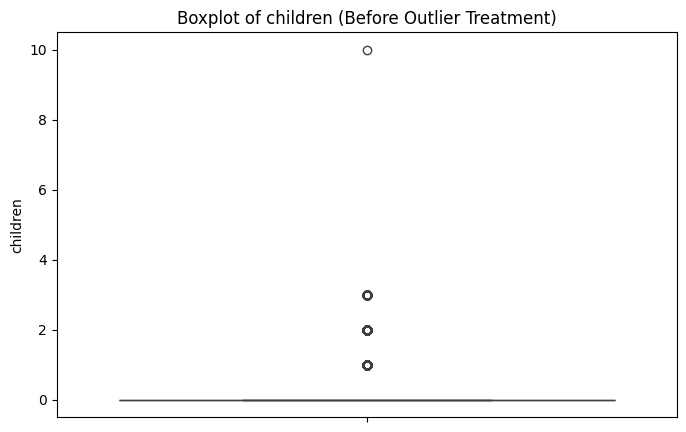

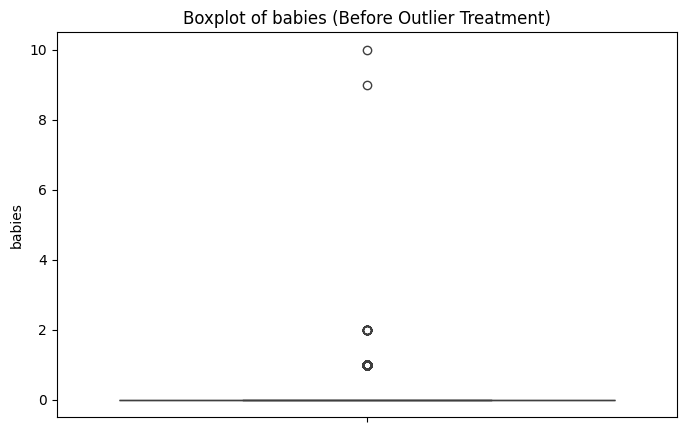

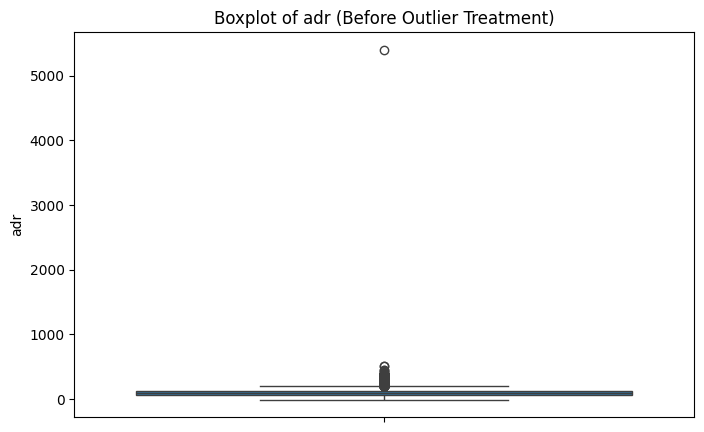

In [54]:
# Visualization with boxplots
for col in cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (Before Outlier Treatment)')
    plt.show()

In [55]:
# adr can have 0 or even negative values in some datasets which might be valid
# however, extremely high adr values are likely outliers
# lets cap adr at the upper bound calculated by IQR for this example
# also handle potential negative ADRs (if not already filtered by impossible values)
Q1 = df_cleaned['adr'].quantile(0.25)
Q3 = df_cleaned['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

df_cleaned['adr'] = np.where(df_cleaned['adr'] < 0, 0, df_cleaned['adr']) # set negative adr to 0 if it occurs
df_cleaned['adr'] = np.where(df_cleaned['adr'] > upper_bound_iqr, upper_bound_iqr, df_cleaned[col])
print(f"'{col}' treated by capping at IQR upper bound and setting negative values to 0.")

'adr' treated by capping at IQR upper bound and setting negative values to 0.


In [ ]:
for col in ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']:
    # 1. Use the IQR method for outlier detection
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR

    # Cap these at the upper IQR bound as very high values might distort analysis
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound_iqr, upper_bound_iqr, df_cleaned[col])
    print(f"'{col}' treated by capping at IQR upper bound.")

'lead_time' treated by capping at IQR upper bound.
'stays_in_weekend_nights' treated by capping at IQR upper bound.
'stays_in_week_nights' treated by capping at IQR upper bound.


In [ ]:
for col in ['adults', 'children', 'babies']:
        # if there are bookings with 0 guests, these are typically removed as they are illogical bookings.
        # Re-check and remove bookings with 0 total guests
        initial_rows = len(df_cleaned)
        df_cleaned = df_cleaned[~((df_cleaned['adults'] == 0) & (df_cleaned['children'] == 0) & (df_cleaned['babies'] == 0))]
        removed_guests_zero = initial_rows - len(df_cleaned)
        if removed_guests_zero > 0:
            print(f"Removed {removed_guests_zero} rows where adults, children, and babies were all 0.")

Removed 166 rows where adults, children, and babies were all 0.


### Task 2.4: Data Inconsistency Fixes

In [56]:
# 1. Standardise categorical values
# Inspect unique values for categorical columns (already done in Task 1.3)
# Look for:
# - Case inconsistencies (e.g., 'City Hotel' vs 'city hotel')
# - Leading/trailing spaces (e.g., 'Resort Hotel ')
# - Typos or alternative spellings

# Review common categorical columns and apply strip and upper/lower for consistency
for col in ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type']:
    if col in df_cleaned.columns and df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.strip()

# Fix date format inconsistencies
# The dataset has 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'.
# Combine these to a single datetime column. This implicitly handles formatting.
df_cleaned['arrival_date'] = pd.to_datetime(df_cleaned['arrival_date_year'].astype(str) + '-' +
                                            df_cleaned['arrival_date_month'].astype(str) + '-' +
                                            df_cleaned['arrival_date_day_of_month'].astype(str),
                                            errors='coerce')

# Check for any NaT (Not a Time) values resulting from invalid date combinations
if df_cleaned['arrival_date'].isnull().any():
    print(f"\nFound {df_cleaned['arrival_date'].isnull().sum()} invalid arrival dates after conversion.")
    # Decide how to handle them: remove rows, or impute (if logical, e.g., for missing day/month).
    # For this task, if 'errors'='coerce' created NaT, consider removing those rows or investigating further.
    df_cleaned.dropna(subset=['arrival_date'], inplace=True) # Removing rows with invalid dates

# Drop the original date components if the combined column is preferred
df_cleaned.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

# Handle impossible combinations (already largely done in Outlier Treatment for 0 guests)
# As per instructions, "adults = 0 and children = 0 and babies = 0" was handled.
# Re-confirm if any such rows exist after other cleaning steps.
illogical_guests_after_clean = df_cleaned[(df_cleaned['adults'] == 0) & (df_cleaned['children'] == 0) & (df_cleaned['babies'] == 0)]
if len(illogical_guests_after_clean) > 0:
    print(f"\nStill found {len(illogical_guests_after_clean)} rows with 0 total guests. Removing them.")
    df_cleaned = df_cleaned[~((df_cleaned['adults'] == 0) & (df_cleaned['children'] == 0) & (df_cleaned['babies'] == 0))]

# Validate logical constraints (further checks)
# Example: 'stays_in_weekend_nights' and 'stays_in_week_nights' cannot be negative
df_cleaned['stays_in_weekend_nights'] = np.where(df_cleaned['stays_in_weekend_nights'] < 0, 0, df_cleaned['stays_in_weekend_nights'])
df_cleaned['stays_in_week_nights'] = np.where(df_cleaned['stays_in_week_nights'] < 0, 0, df_cleaned['stays_in_week_nights'])
print("Checked for negative stay nights and set to 0 if found.")

# Ensure 'is_canceled' is binary (0 or 1)
df_cleaned['is_canceled'] = df_cleaned['is_canceled'].astype(int)
print("Ensured 'is_canceled' is an integer (0 or 1).")


Still found 180 rows with 0 total guests. Removing them.
Checked for negative stay nights and set to 0 if found.
Ensured 'is_canceled' is an integer (0 or 1).


## Phase 3: Data Validation and Documentation

### Task 3.1: Data Integrity Checks

In [58]:
# Verify once again that all records have at least one guest
total_guests_zero = df_cleaned[(df_cleaned['adults'] + df_cleaned['children'] + df_cleaned['babies']) == 0]
if len(total_guests_zero) == 0:
    print("\nValidation: All records have at least one guest (adults + children + babies > 0).")
else:
    print(f"\nValidation: Found {len(total_guests_zero)} records with 0 total guests. Investigate further.")


Validation: All records have at least one guest (adults + children + babies > 0).


In [60]:
# Check that arrival dates are within the expected range (From July 2015 to August 2017)
start_date = pd.to_datetime('2015-07-01')
end_date = pd.to_datetime('2017-08-31')

dates_out_of_range = df_cleaned[(df_cleaned['arrival_date'] < start_date) | (df_cleaned['arrival_date'] > end_date)]

if len(dates_out_of_range) == 0:
  print("All arrival dates are within expected range.")
else:
  print(f"Found {len(dates_out_of_range)} dates out of the expected range.")

All arrival dates are within expected range.


In [103]:
# Check the numerical types once again to validate that values are within reasonable ranges

numerical_types = df_cleaned.select_dtypes(include=['int64', 'float64'])
print(numerical_types.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [108]:
for col in numerical_types.columns:
  print(df_cleaned[col].describe(), end='\n')

count    119210.000000
mean          0.370766
std           0.483012
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64
count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64
count    119210.000000
mean         27.163376
std          13.601107
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64
count    119210.000000
mean          0.927053
std           0.995117
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64
count    119210.000000
mean          2.499195
std           1.897106
min           0.000000
25%          

In [105]:
# Validate that numerical values are within reasonable ranges

for col in numerical_types:
  print(f"For column {col} : Min {df_cleaned[col].min()} and Max {df_cleaned[col].max()}")

For column is_canceled : Min 0 and Max 1
For column lead_time : Min 0 and Max 737
For column arrival_date_week_number : Min 1 and Max 53
For column stays_in_weekend_nights : Min 0 and Max 19
For column stays_in_week_nights : Min 0 and Max 50
For column adults : Min 0 and Max 55
For column children : Min 0.0 and Max 10.0
For column babies : Min 0 and Max 10
For column is_repeated_guest : Min 0 and Max 1
For column previous_cancellations : Min 0 and Max 26
For column previous_bookings_not_canceled : Min 0 and Max 72
For column booking_changes : Min 0 and Max 18
For column agent : Min 0.0 and Max 535.0
For column company : Min 0.0 and Max 543.0
For column days_in_waiting_list : Min 0 and Max 391
For column adr : Min 0.0 and Max 211.065
For column required_car_parking_spaces : Min 0 and Max 8
For column total_of_special_requests : Min 0 and Max 5


In [112]:
# Checking the categorical type columns once again to validate that they are from expected sets

categorical_types = df_cleaned.select_dtypes(include='object')
print(categorical_types.columns)

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')


In [113]:
for col in categorical_types.columns:
  print(f"Unique values from column {col} : {df_cleaned[col].unique()}")

Unique values from column hotel : ['Resort Hotel' 'City Hotel']
Unique values from column meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values from column country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 

In [117]:
# Ensure categorical values are from expected sets
print("\nValidating categorical values are from expected sets:")
expected_hotel_types = ['City Hotel', 'Resort Hotel']
if not set(df_cleaned['hotel'].unique()).issubset(expected_hotel_types):
    print(f"Warning: 'hotel' column contains unexpected values: {set(df_cleaned['hotel'].unique()) - set(expected_hotel_types)}")
else:
    print("'hotel' column values are consistent.")


Validating categorical values are from expected sets:
'hotel' column values are consistent.


### Task 3.2: Create Data Cleaning Report

In [115]:
# Will be done separately

### Task 3.3: Final Dataset Preparation

In [116]:
# Save the final cleaned dateset
df.to_csv('..\data\hotel_bookings_cleaned.csv')